DECISION TREE

In [2]:
#1. DATA PREPARATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/heart_disease.xlsx'
df = pd.read_excel(file_path)

print(df.head())
print(df.columns)

        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
Index(['age', 'Age in years'], dtype='object')


In [3]:
#Identify Potential Target Column
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print()

Column: age
['Gender' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalch' 'exang'
 'oldpeak' 'slope' 'thal' 'num']

Column: Age in years
['Gender ; Male - 1, Female -0' 'Chest pain type' 'Resting blood pressure'
 'cholesterol measure'
 '(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)'
 "ecg observation at resting condition,   -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
 'maximum heart rate achieved' 'exercise induced angina'
 'ST depression induced by exercise relative to rest'
 'the slope of the peak exercise ST segment' 'Thal'
 'target [0=no heart disease; 1,2,3,4 = stages of heart disease ]']



In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()


,age,Age in years
0,0,2
1,2,1
2,11,3
3,1,6
4,4,0


In [5]:
# treating missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

df.fillna(df.median(), inplace=True)


Series([], dtype: int64)


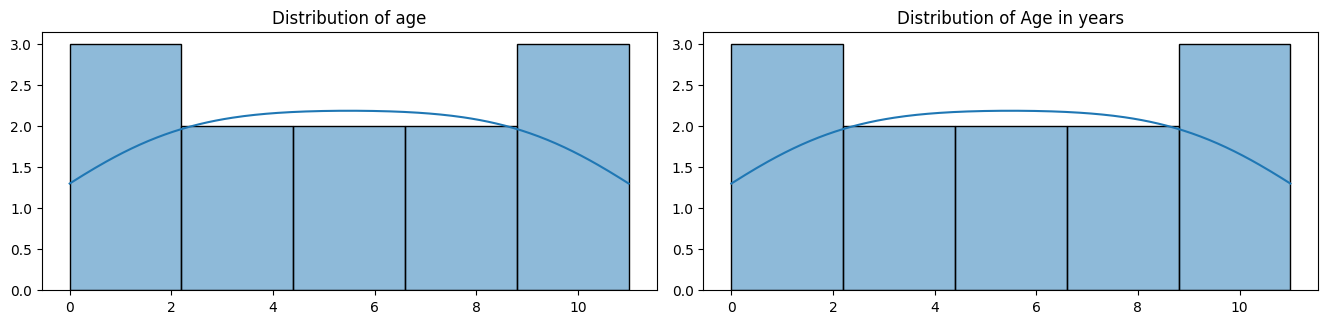

In [6]:
#2. Exploratory Data Analysis (EDA)
# Create histograms for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


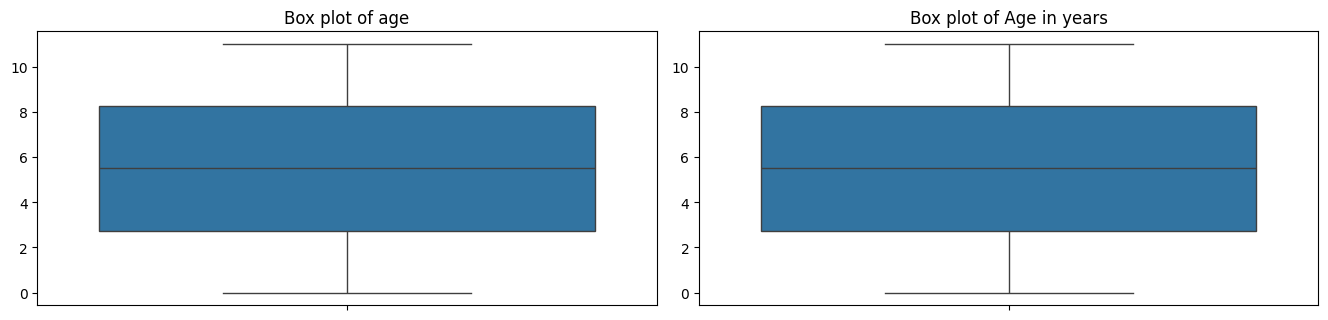

In [7]:
# Create box plots for each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


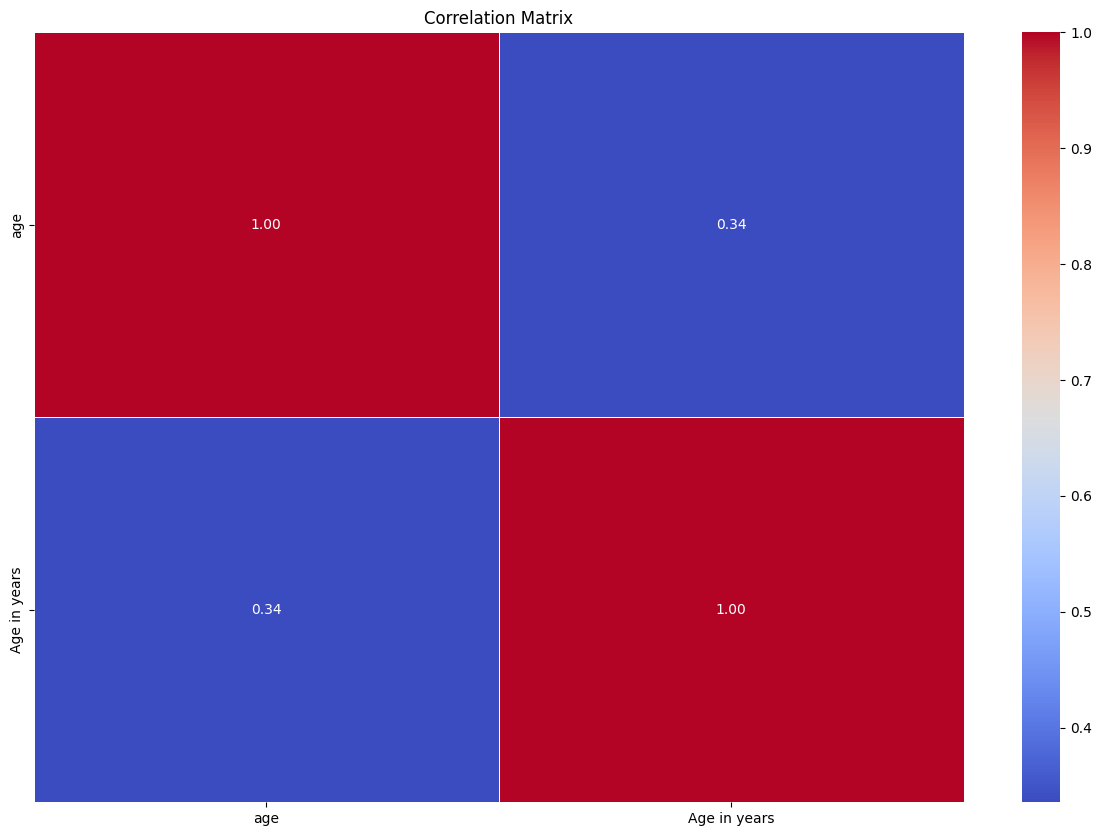

In [8]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
#3. Feature Engineering
from sklearn.preprocessing import StandardScaler
target_column = 'age'
X = df.drop(target_column, axis=1)
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
#4. Decision tree classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [22]:
#train and evalute the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(classification_report(y_test, y_pred))


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

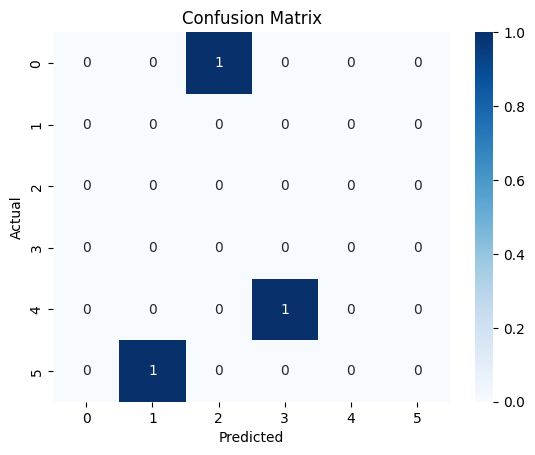

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
